In [1]:
import numpy as np
import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True
plt.set_cmap("tab20")

In [2]:
#presets for plot style
from scipy.constants import golden
rc = plt.rc
rc('text', usetex=False)
import matplotlib as mpl
rc('font', family='serif')
rc('text', usetex=False)
rc('font', size=18)
rc('xtick', labelsize=18)
rc('ytick', labelsize=18)
rc('axes', labelsize=18)
rc('legend', fontsize=18)

import matplotlib.patches as patches

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

In [32]:


def draw_mask(layer, clearance=3.85):
    if layer=="ecal_straight":
        beampipeR=11.15 + 0.045*(-17/2.34)
        holeR=15
        holeX=-7.7
        beampipeX=-7.7  - 0.0569*(-17/2.34)
        z=380-17 #front face of WScFi
    elif layer=="ecal_cone":  #cone version of the ECal
        beampipeR=11.15 + 0.045*(-17/2.34)
        holeR=beampipeR+clearance
        beampipeX=-7.7  - 0.0569*(-17/2.34)
        holeX=beampipeX
        z=380-17 #front face of WScFi
    else:
        holeX =  -7.7  - 0.0569*layer
        beampipeX=holeX
        beampipeR=11.15 + 0.045*layer
        #holeR = 16.15 + 0.045*layer
        holeR=beampipeR+clearance
        z=380+2.34*layer+1.61+.2
    #D hole
    plt.gca().add_patch(plt.Circle((holeX, 0), holeR, color='#ffffff', zorder=99))    
    plt.gca().add_patch(plt.Rectangle((holeX, -holeR), -holeX, holeR*2, color='#ffffff', zorder=99))
    #top
    plt.gca().add_patch(plt.Rectangle((24.8-69.6,29.9), 69.6,4.8, color='#ffffff', zorder=99))
    #bottom
    plt.gca().add_patch(plt.Rectangle((24.8-69.6,-34.8), 69.6,-29.9+34.8, color='#ffffff', zorder=99))
    #right
    plt.gca().add_patch(plt.Rectangle((19.8,-34.8), -19.8+24.8,69.6, color='#ffffff', zorder=99))
    #left
    plt.gca().add_patch(plt.Rectangle((-39.8-5.0,-34.8), 5.0,69.6, color='#ffffff', zorder=99))
    
    #gap
    plt.gca().add_patch(plt.Rectangle((-0.2,-29.9), 0.4, 59.8, color='#ffffff', zorder=99))
    
    #draw beampipe
    phi= np.linspace(0, 2*np.pi, 101)
    plt.plot(beampipeX+beampipeR*np.cos(phi), beampipeR*np.sin(phi), color='k', linewidth=0.5, zorder=100)
    plt.plot(beampipeX+(beampipeR-.4)*np.cos(phi), (beampipeR-.4)*np.sin(phi), color='k', linewidth=0.5, zorder=100)



    #draw outline of sensor
    plt.plot([holeX,-.2,-.2,-39.8,-39.8, -.2, -.2, holeX], [-holeR,-holeR,-29.9, -29.9, 29.9, 29.9,holeR, holeR], 
             color='k', linewidth=0.5,zorder=100)
    phi = np.linspace(-np.pi/2, np.pi/2, 25)
    plt.plot(holeX-np.cos(phi)*holeR, holeR*np.sin(phi), color='k', linewidth=0.5, zorder=100)


    phi0 = np.arccos((holeX-.2)/holeR)
    plt.plot([.2,.2,19.8,19.8, .2, .2], [-holeR*np.sin(phi0),-29.9, -29.9, 29.9, 29.9, 
                                               holeR*np.sin(phi0)], color='k', linewidth=0.5, zorder=100)
    phi = np.linspace(phi0,2*np.pi-phi0, 25)
    plt.plot(holeX-np.cos(phi)*holeR, holeR*np.sin(phi), color='k', linewidth=0.5,zorder=100)
    
    #next label the z axis, beampipe center, and z* axis
    plt.plot([0],[0], marker="s", zorder=100, color='b')
    plt.text(0,0, " $z$", color='b', fontsize=17, horizontalalignment='left', zorder=100)
    
    plt.plot([-z*.025],[0], marker='*', zorder=100, color='r')
    plt.text(-z*.025,0, " $z^*$", color='r', fontsize=17, 
             horizontalalignment='left', zorder=100)
    
    #draw arrows indicating clearance and beampipe radii, including arrowheads
    arrowhead=0.8
    args=dict(marker="",linestyle='-', zorder=100, color='k', linewidth=0.7)
    plt.plot([holeX, holeX],[0, beampipeR], **args)
    plt.plot([holeX+arrowhead, holeX, holeX-arrowhead], [beampipeR-arrowhead, beampipeR, beampipeR-arrowhead], **args)
    plt.plot([holeX+arrowhead, holeX, holeX-arrowhead], [arrowhead, 0, arrowhead], **args)
    plt.plot([holeX],[0], marker='o', zorder=100, color='k')
    plt.plot([holeX, holeX],[-beampipeR, -holeR], **args)
    plt.plot([holeX+arrowhead, holeX, holeX-arrowhead], [-beampipeR-arrowhead, -beampipeR, -beampipeR-arrowhead], **args)
    plt.plot([holeX+arrowhead, holeX, holeX-arrowhead], [-holeR+arrowhead, -holeR, -holeR+arrowhead], **args)
    plt.text(holeX, beampipeR/2, f" {beampipeR:.2f} cm", zorder=100, verticalalignment='center', fontsize=15)
    plt.text(holeX, -(holeR+beampipeR)/2, f" {holeR-beampipeR:.2f} cm", zorder=100, verticalalignment='center', fontsize=15)
    

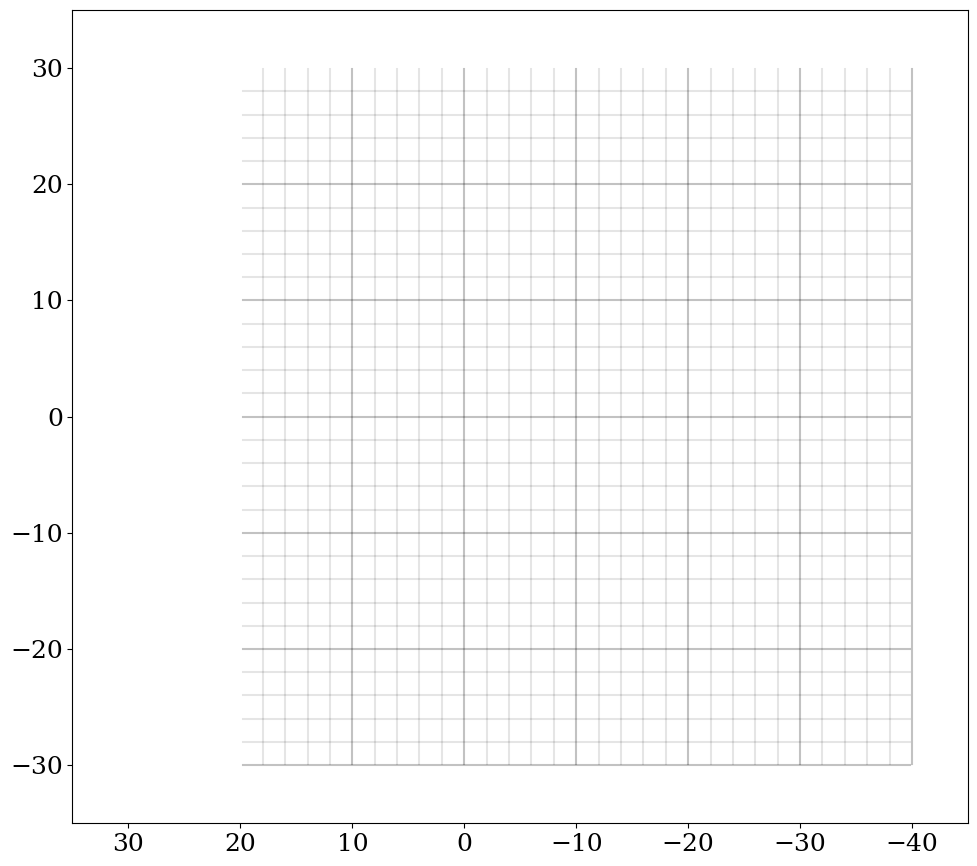

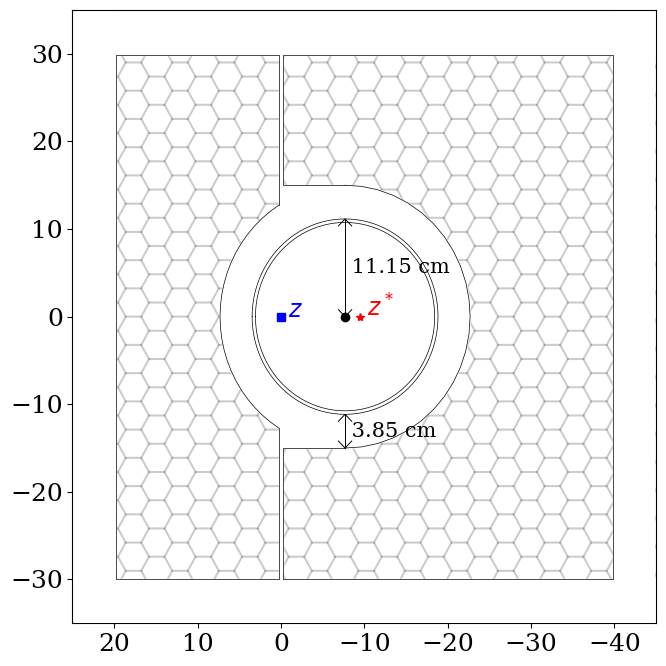

In [33]:
def draw_hexagons(layer, hexArea, alpha=0.2):
    
    
    s= np.sqrt(hexArea/(np.sqrt(3)*6/4)) #side length
    for i in range(-1-int(40/(3*s)), int(20/(3*s)+1)):
        for j in range(-int(30/(np.sqrt(3)/2*s)), int(30/(np.sqrt(3)/2*s))+2):
            plt.plot([(3*i+3*(j%2)/2-1/2)*s,(3*i+3*(j%2)/2)*s, (3*i+1+3*(j%2)/2)*s,(3*i+3/2+3*(j%2)/2)*s], 
                     [(j-1)*s*np.sqrt(3)/2,j*s*np.sqrt(3)/2, j*s*np.sqrt(3)/2,(j-1)*s*np.sqrt(3)/2], color='k', alpha=alpha)
    
fig, axs= plt.subplots(1, 1, figsize=(7, 7))
draw_hexagons(0, 9)
draw_mask(0, 3.85)
plt.xlim(-45, 25)
plt.ylim(-35, 35)
plt.gca().invert_xaxis()


plt.show()

In [34]:
beamTheta=-0.025
def eta_plot(layer, clearance=3.85):
#     z     = 380   + 2.34*layer
#     holeX =  7.7  + 0.0569*layer
#     beampipeR=11.15 + 0.045*layer
#     #holeR = 16.15 + 0.045*layer
#     holeR=beampipeR+clearance
    if layer=="ecal_straight":
        beampipeR=11.15 + 0.045*(-17/2.34)
        holeR=15
        holeX=7.7
        beampipeX=7.7  - 0.0569*(-17/2.34)
        z=380-17 #front face of WScFi
    elif layer=="ecal_cone":
        beampipeR=11.15 + 0.045*(-17/2.34)
        holeR=beampipeR+clearance
        beampipeX=7.7  - 0.0569*(-17/2.34)
        holeX=beampipeX
        z=380-17 #front face of WScFi
    else:
        holeX =  7.7  - 0.0569*layer
        beamepipeX=holeX
        beampipeR=11.15 + 0.045*layer
        #holeR = 16.15 + 0.045*layer
        holeR=beampipeR+clearance
        z=380+2.34*layer
    
    for i,eta in enumerate(reversed(np.linspace(3.2, 4.0,9))):
        
        #for the legend
        a=plt.plot([],[], label= f"$\eta^*$={eta:.1f}", linestyle='-', linewidth=3 if eta==3.7 else None)
        color= a[0].get_color()
        
        if layer == -1:
            continue
        
        tanTheta=np.tan(2*np.arctan(np.exp(-eta)))
        phi= np.linspace(0, 2*np.pi, 100)
        uxp = tanTheta*np.cos(phi)
        uyp = tanTheta*np.sin(phi)
        uzp = 1
        
        ux = uxp*np.cos(beamTheta)+uzp*np.sin(beamTheta)
        uy = uyp
        uz = -uxp*np.sin(beamTheta)+uzp*np.cos(beamTheta)
        
        ux/=uz
        uy/=uz
        uz/=uz
        
        
        x,y = ux*z, uy*z
        plt.plot(x, y, color=color, linestyle='-', marker='', linewidth=3 if eta==3.7 else None)
              
        
        


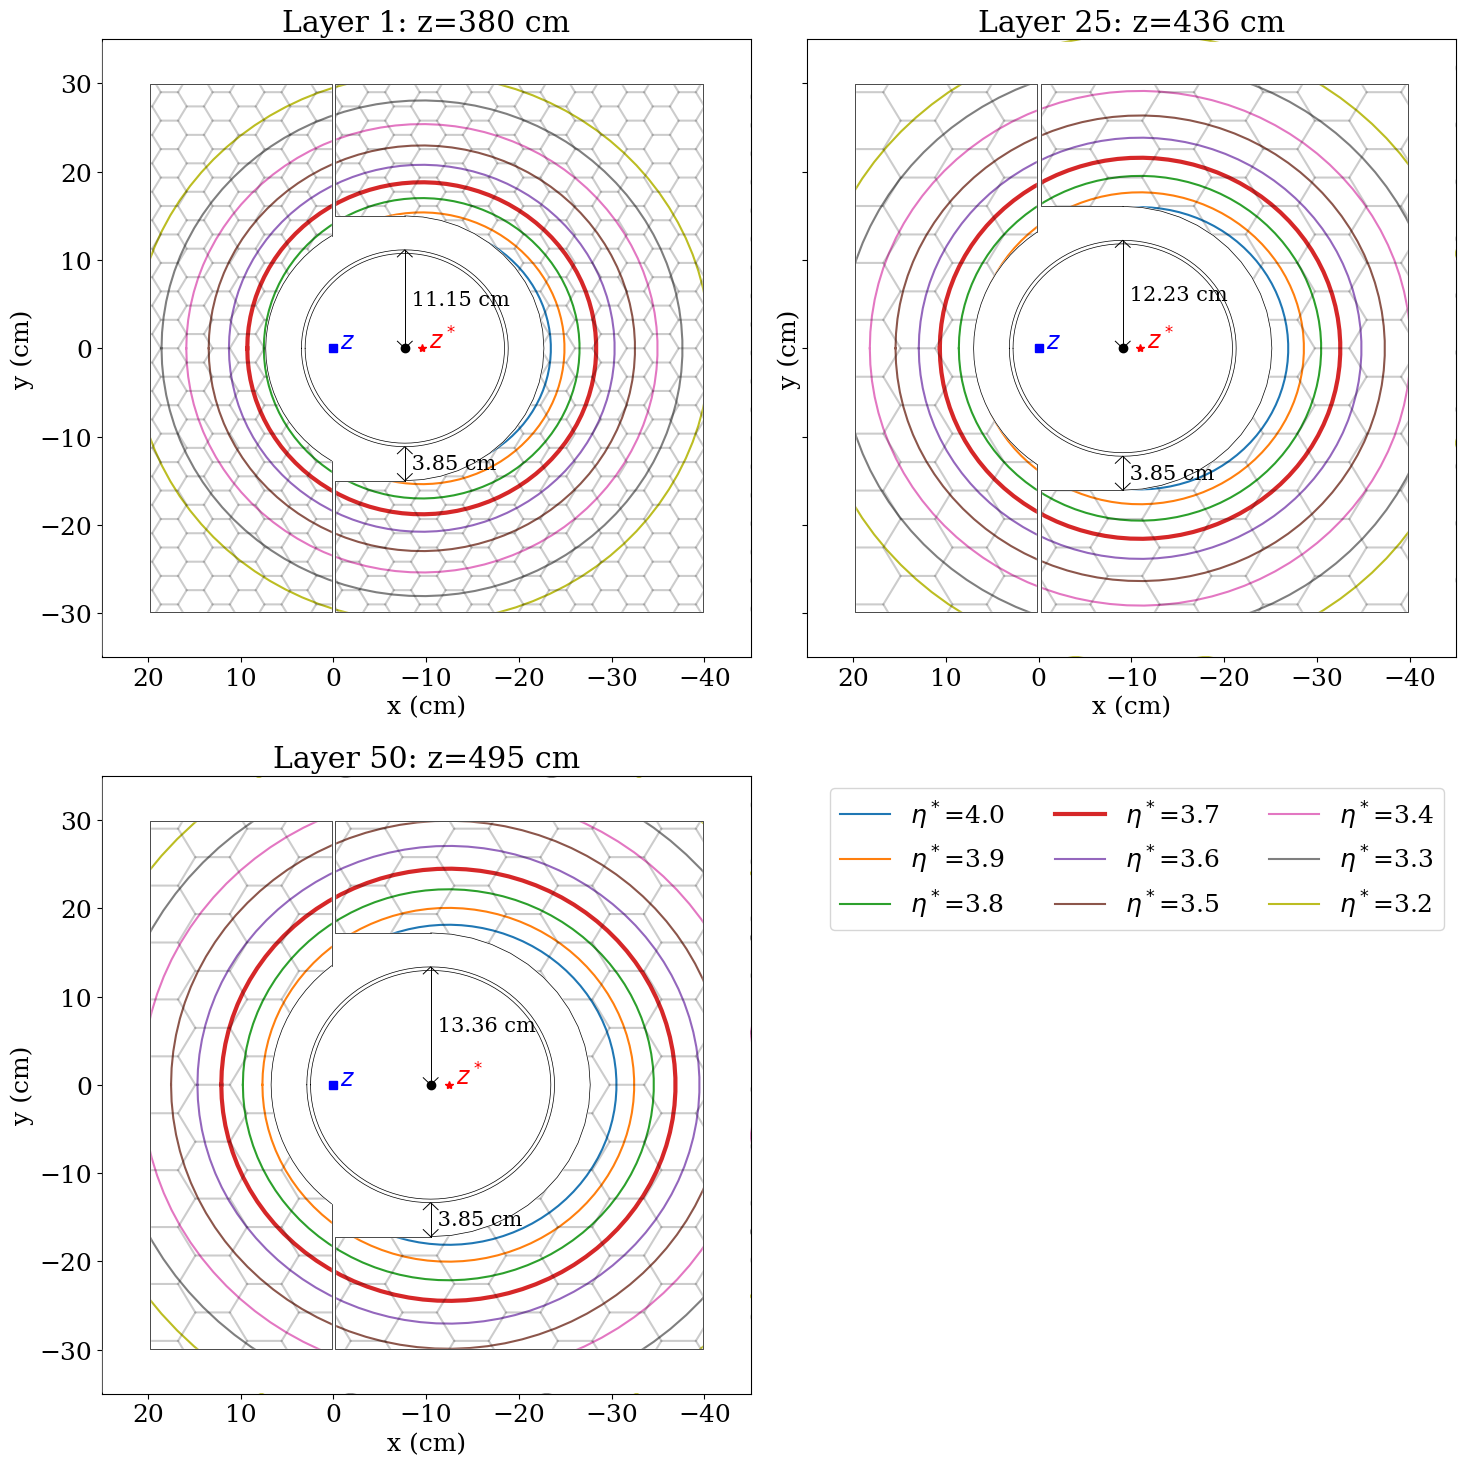

In [6]:
import matplotlib.image as mpimg
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
for clearance in 3.85,:
    fig, axs= plt.subplots(2, 2, figsize=(15, 15), sharex=True, sharey=True)
    axs[0][0].set_ylim(-35, 35)
    axs[0][0].set_xlim(-45, 25)
    hexArea={0:9, 24:36, 49:36}
    for i, layer in enumerate((0, 24, 49, -1)):
        plt.sca(axs[i//2][i%2])
        eta_plot(layer,clearance)
        if layer != -1:
            plt.title(f"Layer {layer+1}: z={380+2.34*layer:.0f} cm")
            draw_hexagons(layer, hexArea[layer], alpha=0.2)
            draw_mask(layer,clearance)
            plt.xlabel("x (cm)")
            plt.ylabel("y (cm)")
            plt.gca().invert_xaxis()
            #plt.text(40, 30, f"clearance={clearance} cm", zorder=100)
    axs[1][1].legend(ncol=3, loc="upper right")
    plt.sca(axs[i//2][i%2])
#     arr = mpimg.imread('/Users/spaul/Documents/Overleaf_git/HCalInsert/figures/sketchup/acceptance.png')
#     imagebox = OffsetImage(arr, zoom=0.15)
#     ab = AnnotationBbox(imagebox, (0.2, 0.6))
#     axs[1][1].add_artist(ab)
    axs[0][1].tick_params(labelbottom=True)
    axs[0][0].tick_params(labelbottom=True)
    axs[1][1].axis('off')
    outdir="plots"
    plt.savefig(f"{outdir}/acceptance_{clearance}cm_clearance.pdf")
    plt.savefig(f"{outdir}/acceptance_{clearance}cm_clearance.png")
    
    plt.show()

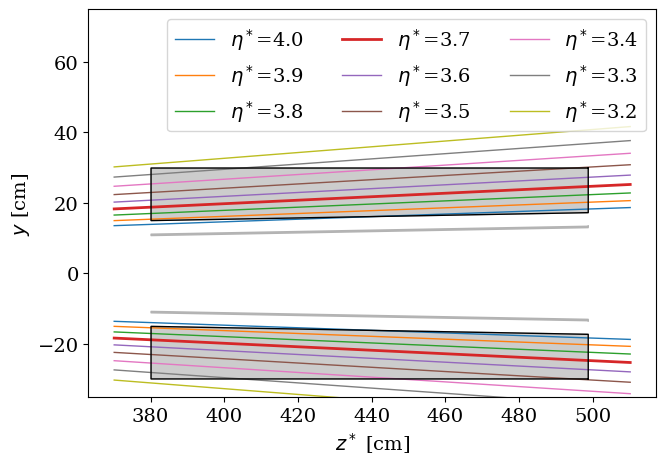

In [7]:
cosTilt=np.cos(.025)
fig,axs = plt.subplots(1, 1, figsize=(7, 5), sharex=True, sharey=True)
#lines of constant eta
for i,eta in enumerate(reversed(np.linspace(3.2, 4.0,9))):
    zstar=[370/cosTilt,(510)/cosTilt]
    y = np.multiply(zstar,np.tan(2*np.arctan(np.exp(-eta))))
    a=plt.plot(zstar, y, linestyle='-', marker='', linewidth=2 if eta==3.7 else 1, label= f"$\eta^*$={eta:.1f}")     
    plt.plot(zstar, -y, linestyle='-', marker='', linewidth=2 if eta==3.7 else 1, label= None, color=a[0].get_color()) 

for sign in 1, -1:
    plt.plot([(380+2.34*50+1.61)/cosTilt, 380/cosTilt, 380/cosTilt, (380+2.34*50+1.61)/cosTilt,(380+2.34*50+1.61)/cosTilt], [sign*29.9, sign*29.9, sign*15, sign*(15+.045*50),sign*29.9], color='k', linewidth=1)
    plt.fill([(380+2.34*50+1.61)/cosTilt, 380/cosTilt, 380/cosTilt, (380+2.34*50+1.61)/cosTilt,(380+2.34*50+1.61)/cosTilt], [sign*29.9, sign*29.9, sign*15, sign*(15+.045*50),sign*29.9], color='0.8')
    
    #beampipe:
    plt.plot([(380+2.34*50+1.61)/cosTilt, 380/cosTilt, 380/cosTilt, (380+2.34*50+1.61)/cosTilt,(380+2.34*50+1.61)/cosTilt], np.multiply(sign,[11.15+0.045*50, 11.15, 11.15-.4, 11.15+0.045*50-.4, 11.15+0.045*50]), color='0.7', linewidth=1)
plt.xlabel("$z^*$ [cm]", fontsize=14)
plt.ylabel("$y$ [cm]", fontsize=14)
plt.tick_params(labelsize=14)
plt.ylim(-35,75)
plt.legend(ncol=3, loc="upper right",fontsize=14)
plt.savefig("plots/eta_vs_y_z.png")
plt.savefig("plots/eta_vs_y_z.pdf")
plt.show()

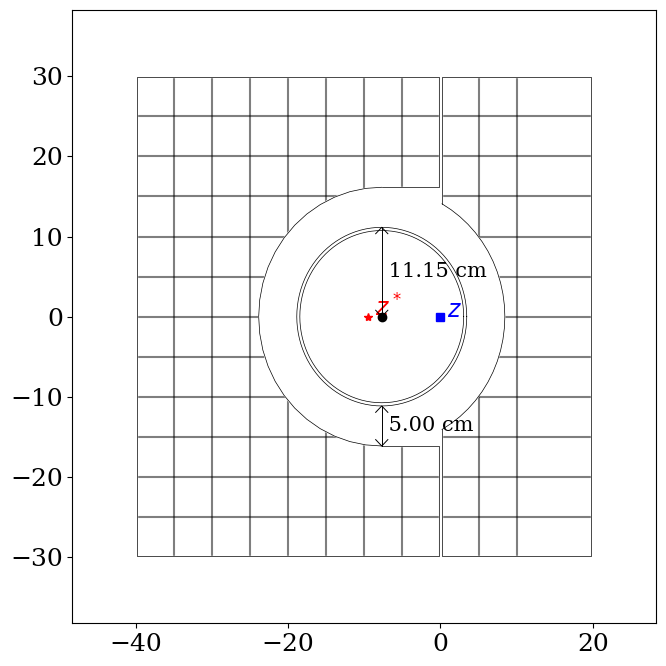

In [8]:
def draw_squares(layer, alpha=1):
    
    for i in range(-5, 6):
        plt.plot([19.8, -39.8], [i*5, i*5], color='#000000', alpha=alpha, linestyle='-')
    for i in range(-8, 3):
        plt.plot([i*5, i*5], [-29.9, 29.9], color='#000000', alpha=alpha, linestyle='-')

    
fig, axs= plt.subplots(1, 1, figsize=(7, 7))
draw_squares(0, 0.5)
draw_mask(0, 5)
plt.show()

In [9]:
outdir='/home/spaul/Documents/Overleaf_git/HCalInsert/figures/'

In [10]:
def draw_squares(layer, alpha=1, sidelength=5):
    
    for i in range(-int(np.floor(30/sidelength)), int(np.floor(30/sidelength))):
        plt.plot([19.8, -39.8], [i*sidelength, i*sidelength], color='#000000', alpha=alpha, linestyle='-')
    for i in range(-int(np.floor(40/sidelength)), int(np.floor(20/sidelength))):
        plt.plot([i*sidelength, i*sidelength], [-29.9, 29.9], color='#000000', alpha=alpha, linestyle='-')



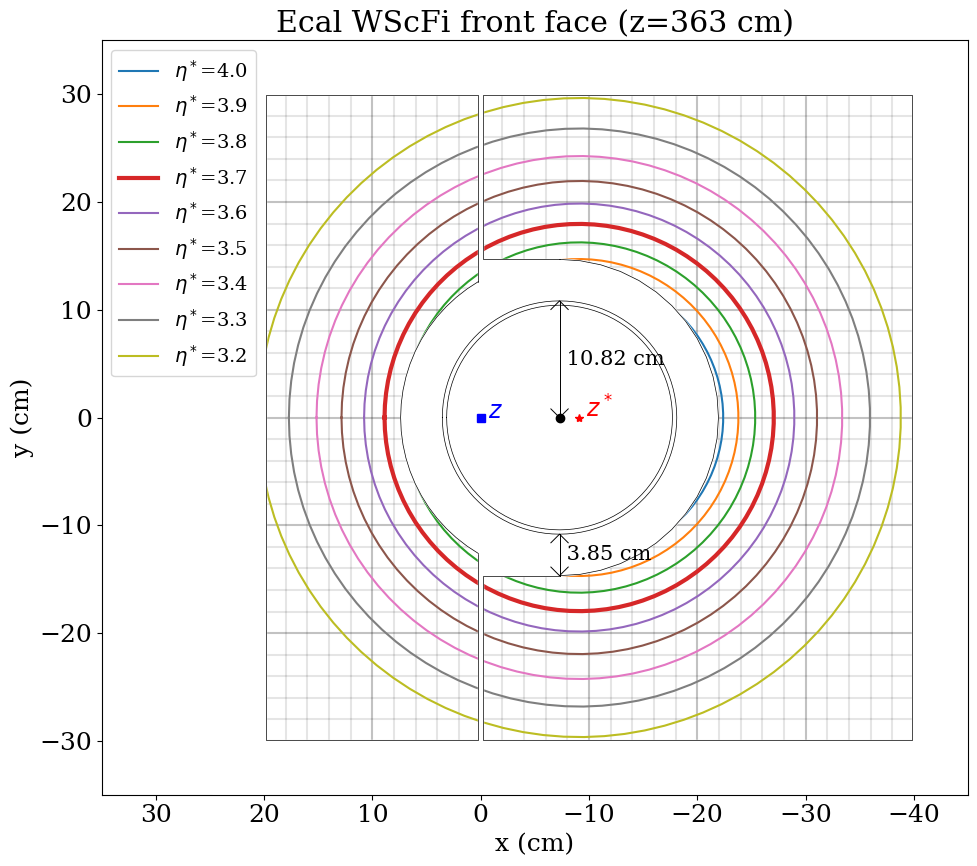

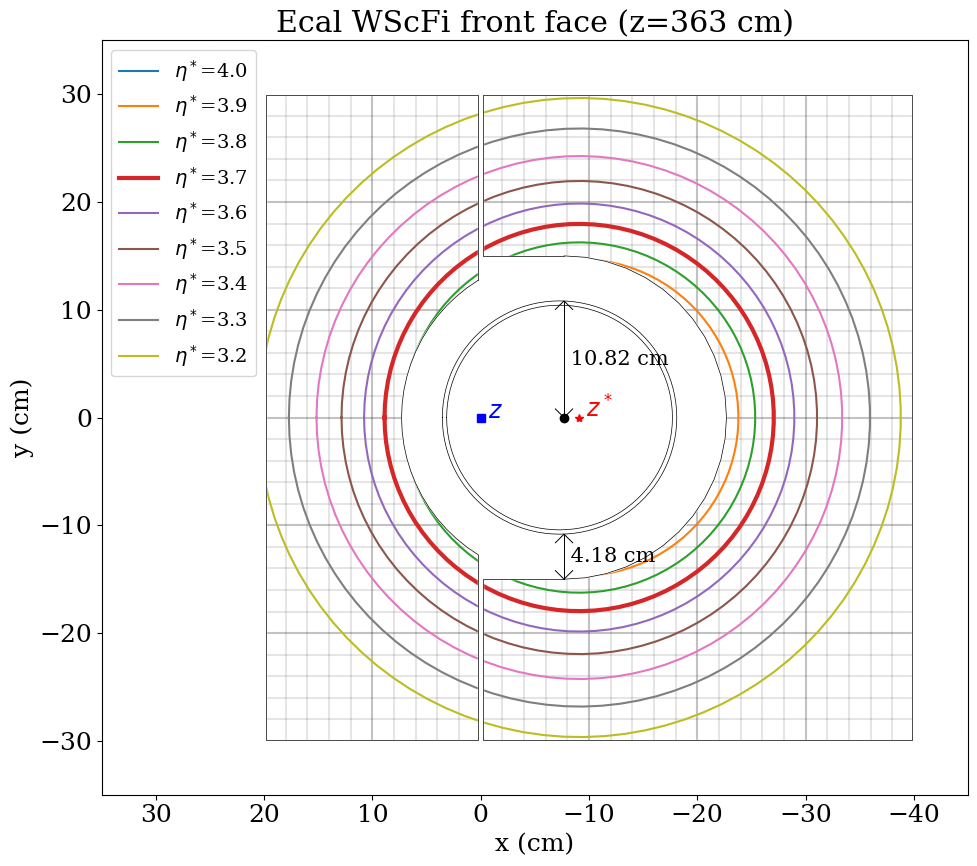

In [35]:
for ecaltype in "cone straight".split():
    for sidelength in 2,:
        fig, axs= plt.subplots(1, 1, figsize=(10.12, 9))
        axs.set_ylim(-35, 35)
        axs.set_xlim(35, -45)
        draw_squares(0, alpha=0.1, sidelength=sidelength)
        draw_squares(0, alpha=0.15, sidelength=10)
        draw_mask(f"ecal_{ecaltype}",3.85)
        plt.xlabel("x (cm)")
        plt.ylabel("y (cm)")
        plt.title("Ecal WScFi front face (z=363 cm)")
        eta_plot(f"ecal_{ecaltype}",3.85)
        plt.legend(ncol=1, loc="upper left",fontsize=14).set_zorder(100)
        plt.savefig(f"plots/Ecal_acceptance_{sidelength*10}mm.png")
        plt.savefig(f"plots/Ecal_acceptance_{sidelength*10}mm.pdf")
        plt.show()

In [59]:
help(OffsetImage)

Help on class OffsetImage in module matplotlib.offsetbox:

class OffsetImage(OffsetBox)
 |  OffsetImage(arr, zoom=1, cmap=None, norm=None, interpolation=None, origin=None, filternorm=True, filterrad=4.0, resample=False, dpi_cor=True, **kwargs)
 |  
 |  The OffsetBox is a simple container artist.
 |  
 |  The child artists are meant to be drawn at a relative position to its
 |  parent.
 |  
 |  Being an artist itself, all parameters are passed on to `.Artist`.
 |  
 |  Method resolution order:
 |      OffsetImage
 |      OffsetBox
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, arr, zoom=1, cmap=None, norm=None, interpolation=None, origin=None, filternorm=True, filterrad=4.0, resample=False, dpi_cor=True, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  draw(self, renderer)
 |      Update the location of children if necessary and draw them
 |      to the given *renderer*.
 |  
 |  ge

In [48]:
layer=1
fig, axs= plt.subplots(2, 2, figsize=(15, 15), sharex=True, sharey=True)
axs[0][0].set_ylim(-35, 35)
axs[0][0].set_xlim(-25, 45)
hexArea={0:9, 24:36, 49:36}
clearances=[3,4,5, 5]

for i, layer in enumerate((0, 0,0, -1)):
    plt.sca(axs[i//2][i%2])
    eta_plot(layer,clearances[i])
    if layer != -1:
        #plt.text(40,30,f"Layer {layer+1}: z={380+2.34*layer:.0f} cm", zorder=100)
        draw_hexagons(layer, hexArea[layer], alpha=0.2)
        draw_mask(layer,clearances[i])
        plt.xlabel("x (cm)")
        plt.ylabel("y (cm)")
        plt.gca().invert_xaxis()
        plt.title(f"clearance={clearances[i]} cm", zorder=100)

axs[1][1].legend(ncol=3, loc="upper right")
axs[1][1].axis('off')

plt.savefig(f"{outdir}/acceptance_different_clearances.pdf")
plt.savefig(f"{outdir}/acceptance_different_clearances.pdf") 

FileNotFoundError: [Errno 2] No such file or directory: '/home/spaul/Documents/Overleaf_git/HCalInsert/figures//acceptance_different_clearances.pdf'

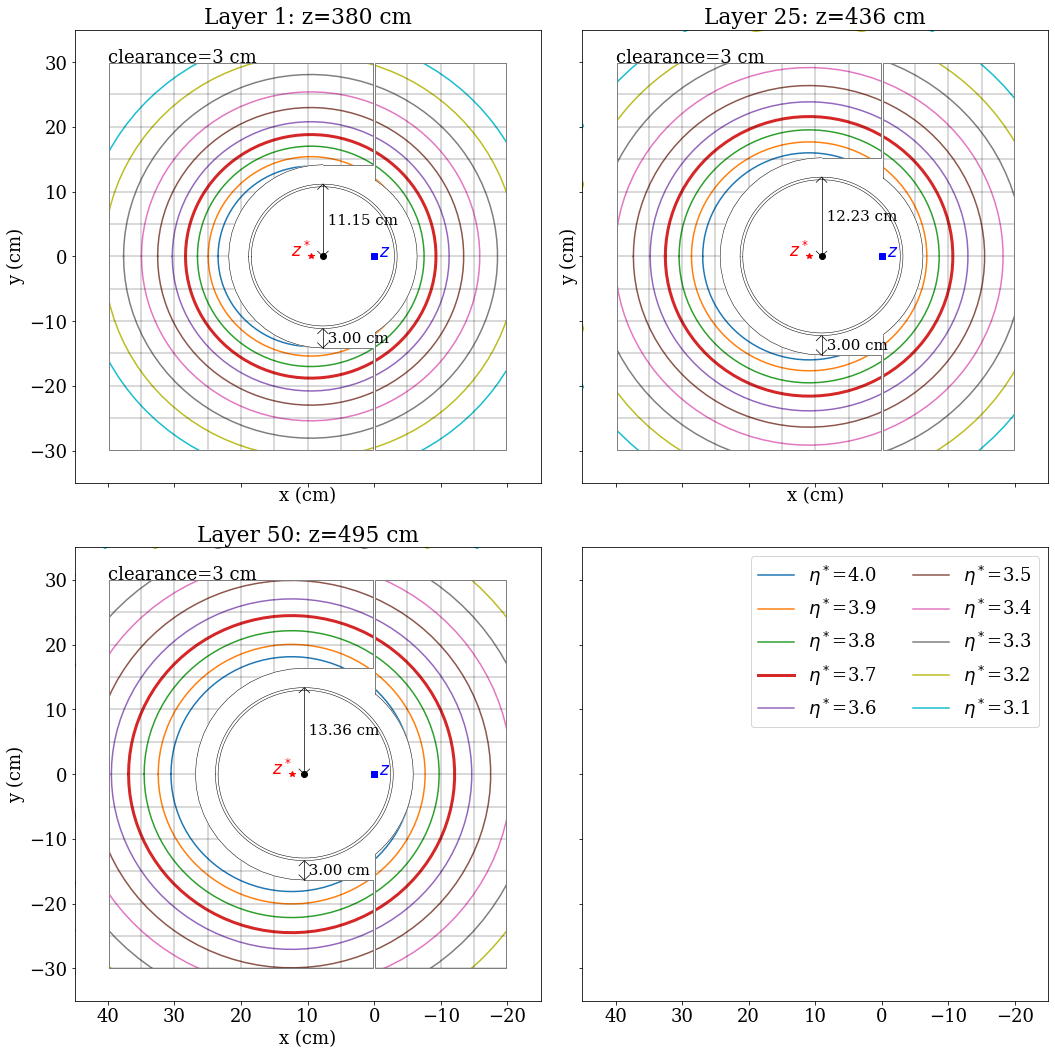

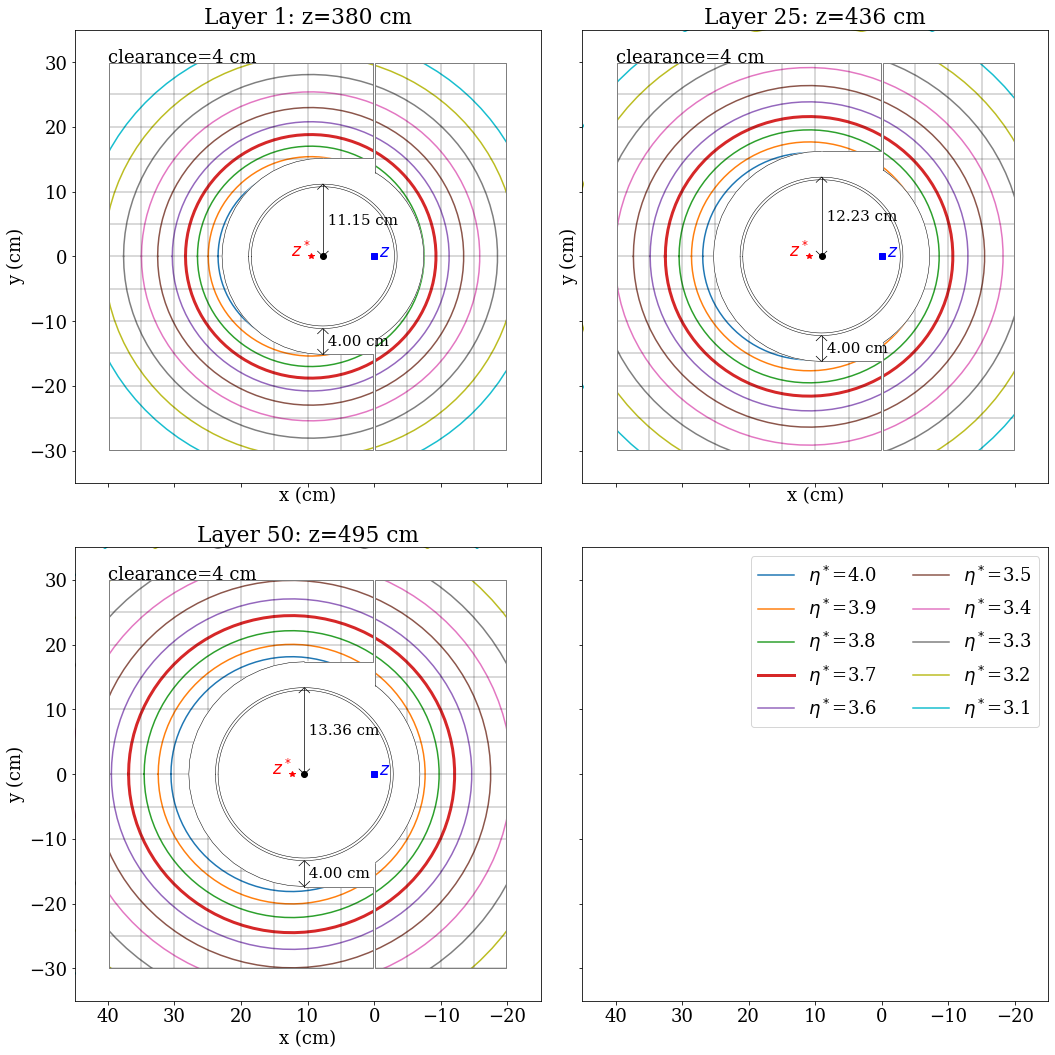

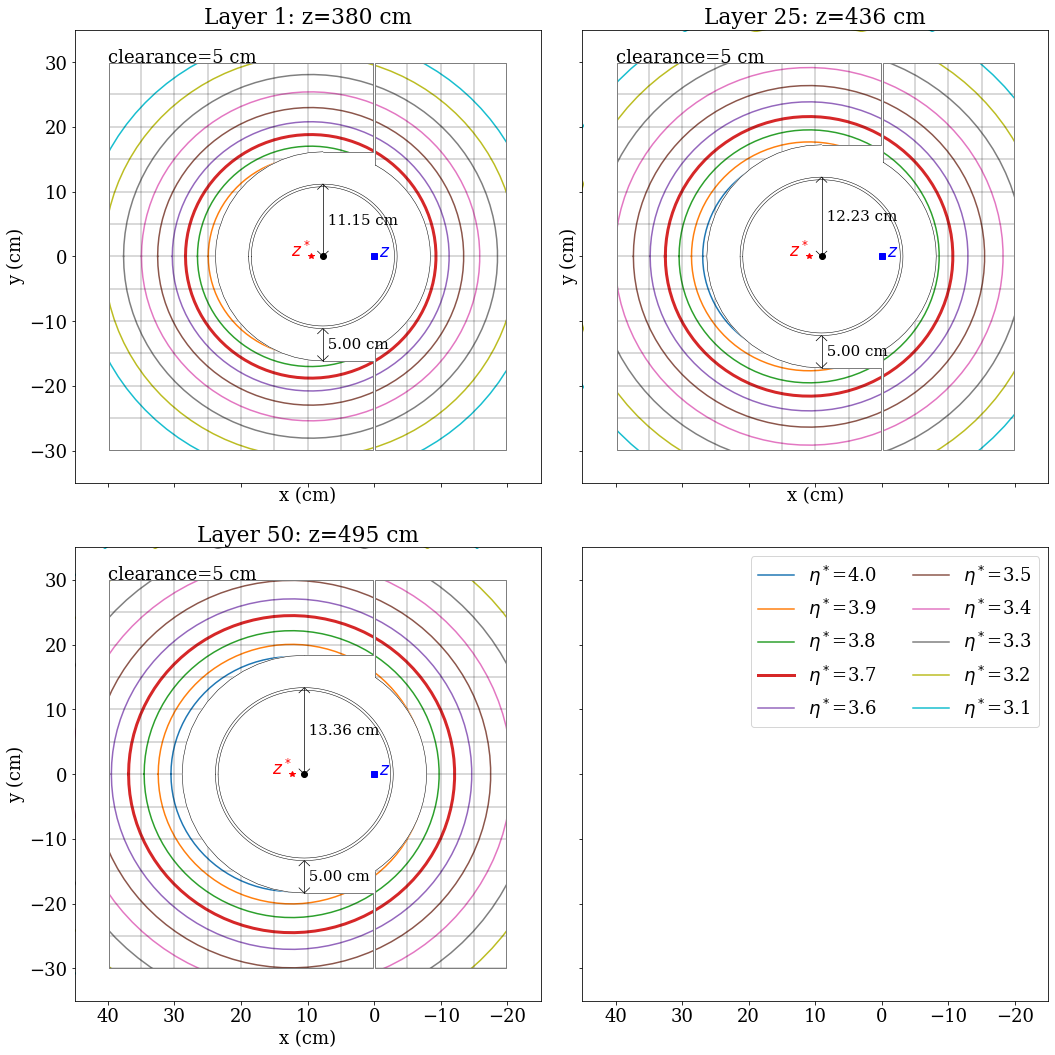

In [17]:
    
for clearance in 3, 4, 5:
    fig, axs= plt.subplots(2, 2, figsize=(15, 15), sharex=True, sharey=True)
    axs[0][0].set_ylim(-35, 35)
    axs[0][0].set_xlim(-25, 45)
    hexArea={0:9, 24:36, 49:36}
    for i, layer in enumerate((0, 24, 49, -1)):
        plt.sca(axs[i//2][i%2])
        eta_plot(layer,clearance)
        if layer != -1:
            plt.title(f"Layer {layer+1}: z={380+2.34*layer:.0f} cm")
            draw_squares(layer, alpha=0.2)
            draw_mask(layer,clearance)
            plt.xlabel("x (cm)")
            plt.ylabel("y (cm)")
            plt.gca().invert_xaxis()
            plt.text(40, 30, f"clearance={clearance} cm", zorder=100)
    axs[1][1].legend(ncol=2, loc="upper right")
    plt.savefig(f"acceptance_{clearance}cm_clearance_5cm_squares.pdf")
    plt.savefig(f"acceptance_{clearance}cm_clearance_5cm_squares.png")

In [18]:
#clearance vs rapidity coverage plot
deltaRs = np.linspace(0, 7, 8)
minRapidity = {0:[], 49:[]}
minRapidity2pi = {0:[], 49:[]}
maxRapidity2pi = {0:[], 49:[]}
maxRapidity = {0:[], 49:[]}

for deltaR in deltaRs:
    
    for layer in 0, 49:
        z     = 380   + 2.34*layer
        holeR = 11.15 + deltaR + 0.045*layer
        holeX =  7.7  + 0.0569*layer
        beampipeR=11.15 + 0.045*layer

        
        minEta = 10
        minEta2pi=10
        maxEta = 0
        maxEta2pi = 0

        for eta in np.linspace(2.0, 5.0,500):

            tanTheta=np.tan(2*np.arctan(np.exp(-eta)))
            phi= np.linspace(0, 2*np.pi, 200)
            uxp = tanTheta*np.cos(phi)
            uyp = tanTheta*np.sin(phi)
            uzp = 1

            ux = uxp*np.cos(beamTheta)+uzp*np.sin(beamTheta)
            uy = uyp
            uz = -uxp*np.sin(beamTheta)+uzp*np.cos(beamTheta)

            ux/=uz
            uy/=uz
            uz/=uz


            x,y = ux*z, uy*z

            npts=0
            for i in range(len(x)):
                if  x[i]>-19.8 and x[i]<39.8 and (x[i]-holeX)**2+y[i]**2>holeR**2\
                        and y[i]>-29.9 and y[i]<29.9 and not (x[i]<holeX and x[i]>0 and abs(y[i])<holeR):
                    npts+=1
                    
            if npts!=0 and eta<minEta:
                minEta = eta;
            if npts==len(x) and eta<minEta2pi:
                minEta2pi = eta;
            if npts==len(x) and eta > maxEta2pi:
                maxEta2pi = eta
            if npts!= 0 and eta>maxEta:
                maxEta = eta
        minRapidity[layer].append(minEta)
        minRapidity2pi[layer].append(minEta2pi)
        maxRapidity2pi[layer].append(maxEta2pi)
        maxRapidity[layer].append(maxEta)

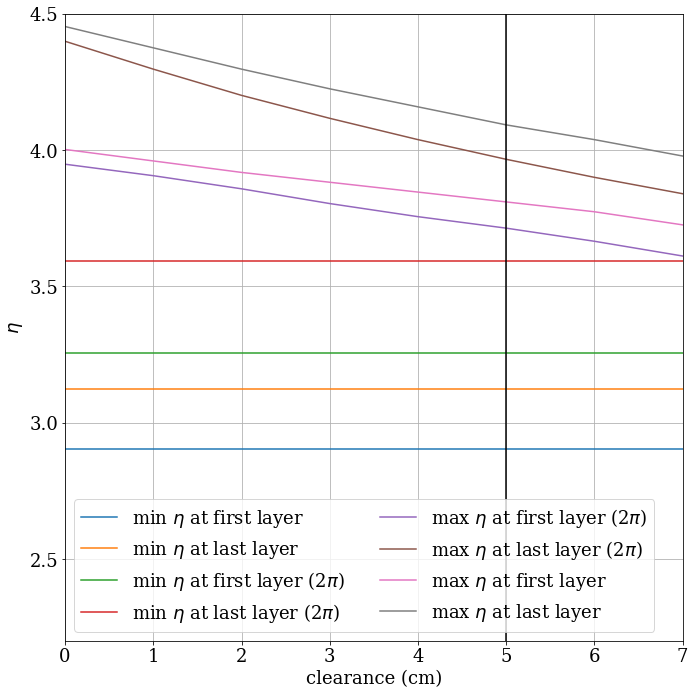

In [19]:
fig, axs= plt.subplots(1, 1, figsize=(10, 10), sharex=True, sharey=True)
plt.plot(deltaRs, minRapidity[0], label="min $\\eta$ at first layer")
plt.plot(deltaRs, minRapidity[49], label="min $\\eta$ at last layer")

plt.plot(deltaRs, minRapidity2pi[0], label="min $\\eta$ at first layer (2$\\pi$)")
plt.plot(deltaRs, minRapidity2pi[49], label="min $\\eta$ at last layer (2$\\pi$)")

plt.plot(deltaRs, maxRapidity2pi[0], label="max $\\eta$ at first layer (2$\\pi$)")
plt.plot(deltaRs, maxRapidity[0], label="max $\\eta$ at last layer (2$\\pi$)")

plt.plot(deltaRs, maxRapidity2pi[49], label="max $\\eta$ at first layer")
plt.plot(deltaRs, maxRapidity[49], label="max $\\eta$ at last layer")
plt.grid()
plt.xlabel("clearance (cm)")
plt.ylabel("$\\eta$")
plt.xlim(0, 7)
plt.ylim(2.2, 4.5)
plt.axvline(5, color='k')
plt.legend(ncol=2)
plt.savefig("eta_vs_clearance.png")
plt.savefig("eta_vs_clearance.pdf")

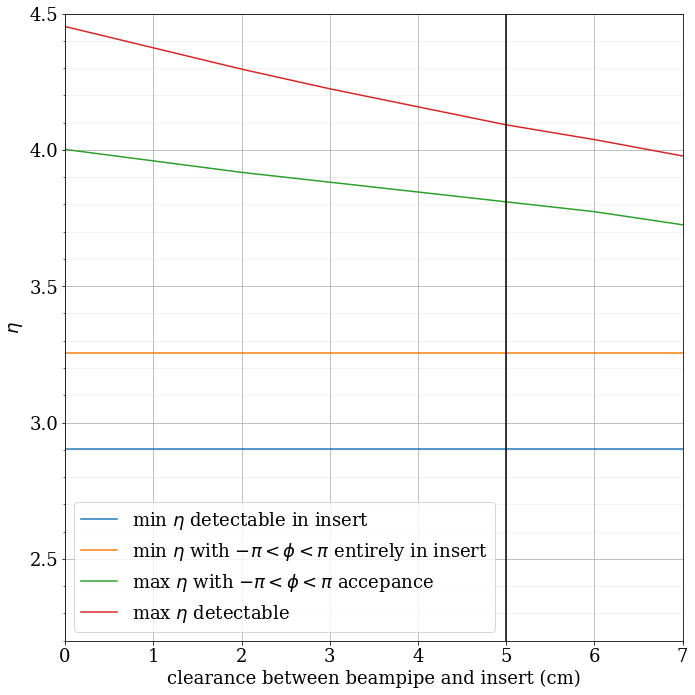

In [20]:
fig, ax= plt.subplots(1, 1, figsize=(10, 10), sharex=True, sharey=True)
plt.plot(deltaRs, minRapidity[0], label="min $\\eta$ detectable in insert")
#plt.plot(deltaRs, minRapidity[49], label="min $\\eta$ at last layer")

plt.plot(deltaRs, minRapidity2pi[0], label="min $\\eta$ with $-\pi<\phi<\pi$ entirely in insert")
#plt.plot(deltaRs, minRapidity2pi[49], label="min $\\eta$ at last layer (2$\\pi$)")

#plt.plot(deltaRs, maxRapidity2pi[0], label="max $\\eta$ at first layer (2$\\pi$)")
plt.plot(deltaRs, maxRapidity2pi[49], label="max $\\eta$ with $-\pi<\phi<\pi$ accepance")

#plt.plot(deltaRs, maxRapidity2pi[49], label="max $\\eta$ at first layer")
plt.plot(deltaRs, maxRapidity[49], label="max $\\eta$ detectable")

major_ticks = np.linspace(2.0, 4.5, 6)
minor_ticks = np.linspace(2.2, 4.5, 24)

#ax.set_xticks(major_ticks)
#ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=1)


plt.xlabel("clearance between beampipe and insert (cm)")
plt.ylabel("$\\eta$")
plt.xlim(0, 7)
plt.ylim(2.2, 4.5)
plt.axvline(5, color='k')
plt.legend(ncol=1)
plt.savefig("eta_vs_clearance.png")
plt.savefig("eta_vs_clearance.pdf")